# Bert Implementation

## Initialization of File Path Variables

In [1]:
ENGLISH_HYPONYMS_TRAIN_FILE = "/kaggle/input/hyp-english/1A.english.training.data.txt"
ENGLISH_HYPERNYMS_TRAIN_FILE = "/kaggle/input/hyp-english/1A.english.training.gold.txt"

ENGLISH_HYPONYMS_DEV_FILE = "/kaggle/input/hyp-english/1A.english.trial.data.txt"
ENGLISH_HYPERNYMS_DEV_FILE = "/kaggle/input/hyp-english/1A.english.trial.gold.txt"

ENGLISH_HYPONYMS_TEST_FILE = "/kaggle/input/hyp-english/1A.english.test.data.txt"
ENGLISH_HYPERNYMS_TEST_FILE = "/kaggle/input/hyp-english/1A.english.test.gold.txt"

ENGLISH_VOCAB_FILENAME = "/kaggle/input/hyp-english/1A.english.vocabulary.txt"

# -------------------------------------------------------------------------------------------------

MEDICAL_HYPONYMS_TRAIN_FILE = "/kaggle/input/hyp-medical/2A.medical.training.data.txt"
MEDICAL_HYPERNYMS_TRAIN_FILE = "/kaggle/input/hyp-medical/2A.medical.training.gold.txt"

MEDICAL_HYPONYMS_DEV_FILE = "/kaggle/input/hyp-medical/2A.medical.trial.data.txt"
MEDICAL_HYPERNYMS_DEV_FILE = "/kaggle/input/hyp-medical/2A.medical.trial.gold.txt"

MEDICAL_HYPONYMS_TEST_FILE = "/kaggle/input/hyp-medical/2A.medical.test.data.txt"
MEDICAL_HYPERNYMS_TEST_FILE = "/kaggle/input/hyp-medical/2A.medical.test.gold.txt"

MEDICAL_VOCAB_FILENAME = "/kaggle/input/hyp-medical/2A.medical.vocabulary.txt"


# -------------------------------------------------------------------------------------------------

MUSIC_HYPONYMS_TRAIN_FILE = "/kaggle/input/hyp-music/2B.music.training.data.txt"
MUSIC_HYPERNYMS_TRAIN_FILE = "/kaggle/input/hyp-music/2B.music.training.gold.txt"

MUSIC_HYPONYMS_DEV_FILE = "/kaggle/input/hyp-music/2B.music.trial.data.txt"
MUSIC_HYPERNYMS_DEV_FILE = "/kaggle/input/hyp-music/2B.music.trial.gold.txt"

MUSIC_HYPONYMS_TEST_FILE = "/kaggle/input/hyp-music/2B.music.test.data.txt"
MUSIC_HYPERNYMS_TEST_FILE = "/kaggle/input/hyp-music/2B.music.test.gold.txt"

MUSIC_VOCAB_FILENAME = "/kaggle/input/hyp-music/2B.music.vocabulary.txt"

# -------------------------------------------------------------------------------------------------

ITALIAN_HYPONYMS_TRAIN_FILE = "/kaggle/input/hyp-itl/1B.italian.training.data.txt"
ITALIAN_HYPERNYMS_TRAIN_FILE = "/kaggle/input/hyp-itl/1B.italian.training.gold.txt"

ITALIAN_HYPONYMS_DEV_FILE = "/kaggle/input/hyp-itl/1B.italian.trial.data.txt"
ITALIAN_HYPERNYMS_DEV_FILE = "/kaggle/input/hyp-itl/1B.italian.trial.gold.txt"

ITALIAN_HYPONYMS_TEST_FILE = "/kaggle/input/hyp-itl/1B.italian.test.data.txt"
ITALIAN_HYPERNYMS_TEST_FILE = "/kaggle/input/hyp-itl/1B.italian.test.gold.txt"

ITALIAN_VOCAB_FILENAME = "/kaggle/input/hyp-itl/1B.italian.vocabulary.txt"

# -------------------------------------------------------------------------------------------------

SPANISH_HYPONYMS_TRAIN_FILE = "/kaggle/input/hyp-spanish/1C.spanish.training.data.txt"
SPANISH_HYPERNYMS_TRAIN_FILE = "/kaggle/input/hyp-spanish/1C.spanish.training.gold.txt"

SPANISH_HYPONYMS_DEV_FILE = "/kaggle/input/hyp-spanish/1C.spanish.trial.data.txt"
SPANISH_HYPERNYMS_DEV_FILE = "/kaggle/input/hyp-spanish/1C.spanish.trial.gold.txt"

SPANISH_HYPONYMS_TEST_FILE = "/kaggle/input/hyp-spanish/1C.spanish.test.data.txt"
SPANISH_HYPERNYMS_TEST_FILE = "/kaggle/input/hyp-spanish/1C.spanish.test.gold.txt"

SPANISH_VOCAB_FILENAME = "/kaggle/input/hyp-spanish/1C.spanish.vocabulary.txt"

## Creating Vocabulory

In [2]:
def read_file(FILENAME):
    with open(FILENAME, encoding='utf-8', errors='ignore') as f:
          lines = f.readlines()
    modified_lines = list()
    for line in lines:
        words = line.strip().split("\t")
        modified_line = ""
        for word in words:
            underscored_word = "_".join(word.split(" ")).lower()
            modified_line += underscored_word + "\t"
        modified_lines.append(modified_line)
    return modified_lines

def merge_hypernyms(hypernyms):
    all_hypernyms = list()
    for hypers in hypernyms:
        all_hypernyms += hypers
    return list(set(all_hypernyms))

In [3]:
def create_vocab_file(hyponyms_train_file, hypernyms_train_file, hyponyms_dev_file, hypernyms_dev_file, hyponyms_test_file, hypernyms_test_file, output_filename):
    hyponyms_train = [line.strip().split("\t")[0] for line in read_file(hyponyms_train_file)]
    hypernyms_train = merge_hypernyms([line.strip().split("\t") for line in read_file(hypernyms_train_file)])
    hyponyms_dev = [line.strip().split("\t")[0] for line in read_file(hyponyms_dev_file)]
    hypernyms_dev = merge_hypernyms([line.strip().split("\t") for line in read_file(hypernyms_dev_file)])
    hyponyms_test = [line.strip().split("\t")[0] for line in read_file(hyponyms_test_file)]
    hypernyms_test = merge_hypernyms([line.strip().split("\t") for line in read_file(hypernyms_test_file)])

    all_words = list()

    all_words += hyponyms_train
    all_words += hypernyms_train
    all_words += hyponyms_dev
    all_words += hypernyms_dev
    all_words += hyponyms_test
    all_words += hypernyms_test

    new_vocab = list(set(all_words))

    return new_vocab

### Vocab for English dataset

In [4]:
vocab = create_vocab_file(ENGLISH_HYPONYMS_TRAIN_FILE, ENGLISH_HYPERNYMS_TRAIN_FILE,
                  ENGLISH_HYPONYMS_DEV_FILE, ENGLISH_HYPERNYMS_DEV_FILE,
                  ENGLISH_HYPONYMS_TEST_FILE, ENGLISH_HYPERNYMS_TEST_FILE,
                  ENGLISH_VOCAB_FILENAME)

### Vocab for Medical dataset

In [27]:
vocab = create_vocab_file(MEDICAL_HYPONYMS_TRAIN_FILE, MEDICAL_HYPERNYMS_TRAIN_FILE,
                  MEDICAL_HYPONYMS_DEV_FILE, MEDICAL_HYPERNYMS_DEV_FILE,
                  MEDICAL_HYPONYMS_TEST_FILE, MEDICAL_HYPERNYMS_TEST_FILE,
                  MEDICAL_VOCAB_FILENAME)

### Vocab for Music dataset

In [29]:
vocab = create_vocab_file(MUSIC_HYPONYMS_TRAIN_FILE, MUSIC_HYPERNYMS_TRAIN_FILE,
                  MUSIC_HYPONYMS_DEV_FILE, MUSIC_HYPERNYMS_DEV_FILE,
                  MUSIC_HYPONYMS_TEST_FILE, MUSIC_HYPERNYMS_TEST_FILE,
                  MUSIC_VOCAB_FILENAME)

### Vocab for Italian dataset

In [22]:
vocab = create_vocab_file(ITALIAN_HYPONYMS_TRAIN_FILE, ITALIAN_HYPERNYMS_TRAIN_FILE,
                  ITALIAN_HYPONYMS_DEV_FILE, ITALIAN_HYPERNYMS_DEV_FILE,
                  ITALIAN_HYPONYMS_TEST_FILE, ITALIAN_HYPERNYMS_TEST_FILE,
                  ITALIAN_VOCAB_FILENAME)

### Vocab for Spanish dataset

In [7]:
vocab = create_vocab_file(SPANISH_HYPONYMS_TRAIN_FILE, SPANISH_HYPERNYMS_TRAIN_FILE,
                  SPANISH_HYPONYMS_DEV_FILE, SPANISH_HYPERNYMS_DEV_FILE,
                  SPANISH_HYPONYMS_TEST_FILE, SPANISH_HYPERNYMS_TEST_FILE,
                  SPANISH_VOCAB_FILENAME)

In [5]:
print("Size of vocab:",len(vocab))

Size of vocab: 8244


## Dataset Preparation

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn import init
import torch.optim as optim
import random 

In [7]:
def dataset_preparation(queryset, word_vocab, hypernyms_tab_sep):
    query_hypernym_training_embedding = []
    y_label = []

    for i in range(len(queryset)):
        if queryset[i] in word_vocab:
            query_word = queryset[i]
            # Create a set of words found in hypernyms_tab_sep[i]
            hypernyms_words_set = set("_".join(hypernym.split()) for hypernym in hypernyms_tab_sep[i].split("\t"))
            
            for hypernyms_found in hypernyms_tab_sep[i].split("\t"):
                hypernyms_found = "_".join(hypernyms_found.split())
                if hypernyms_found in word_vocab:
                    hypernym_word = hypernyms_found
                    query_hypernym_pair = (query_word, hypernym_word)
                    query_hypernym_training_embedding.append(query_hypernym_pair)
                    y_label.append(1)  # positive label for each positive pair

                    # generating 5 negative samples per positive sample
                    negative_samples_counter = 0
                    while negative_samples_counter < 5:
                        random_word = random.choice(word_vocab)
                        if random_word != query_word and random_word not in hypernyms_words_set:
                            negative_pair = (query_word, random_word) 
                            query_hypernym_training_embedding.append(negative_pair)
                            y_label.append(0)  # negative label for negative pairs
                            negative_samples_counter += 1
                else:
                    print(hypernyms_found)
                    hypernym_word = "UNK"
                    query_hypernym_pair = (query_word, hypernym_word) 
                    query_hypernym_training_embedding.append(query_hypernym_pair)
                    y_label.append(1)  # positive label for each positive pair

                    # generating 5 negative samples per positive sample
                    negative_samples_counter = 0
                    while negative_samples_counter < 5:
                        random_word = random.choice(word_vocab)
                        if random_word != query_word:
                            negative_pair = (query_word, random_word)
                            query_hypernym_training_embedding.append(negative_pair)
                            y_label.append(0)  # negative label for negative pairs
                            negative_samples_counter += 1

    # shuffling the dataset
    combined_dataset = list(zip(query_hypernym_training_embedding, y_label))
    random.shuffle(combined_dataset)
    query_hypernym_training_embedding, y_label = zip(*combined_dataset)

    return query_hypernym_training_embedding, y_label

In [8]:
def dataset_preparation_modified(queryset, word_vocab):
    query_word_pairs = []

    for query_word in queryset:
        if query_word not in word_vocab:
            query_word = "UNK"
        # Select a random subset of words from the vocabulary
        random_vocab_words = random.sample(word_vocab, 800)
        for vocab_word in random_vocab_words:
            if vocab_word != query_word:  # Check if the vocab word is not the same as the query word
                query_word_pairs.append((query_word, vocab_word))

    return query_word_pairs

In [9]:
def hypernym_discovery_baseline(task):
    print("Entering parent method")

    if task == "1A":
        training_set = ENGLISH_HYPONYMS_TRAIN_FILE
        training_hypernym_set = ENGLISH_HYPERNYMS_TRAIN_FILE
        testing_set = ENGLISH_HYPONYMS_TEST_FILE
        testing_hypernym_set =ENGLISH_HYPERNYMS_TEST_FILE
        validation_set = ENGLISH_HYPONYMS_DEV_FILE
        validation_hypernym_set = ENGLISH_HYPERNYMS_DEV_FILE
    elif task == "1B":
        training_set = ITALIAN_HYPONYMS_TRAIN_FILE
        training_hypernym_set = ITALIAN_HYPERNYMS_TRAIN_FILE
        testing_set = ITALIAN_HYPONYMS_TEST_FILE
        testing_hypernym_set = ITALIAN_HYPERNYMS_TEST_FILE
        validation_set = ITALIAN_HYPONYMS_DEV_FILE
        validation_hypernym_set = ITALIAN_HYPERNYMS_DEV_FILE
    elif task == "1C":
        training_set = SPANISH_HYPONYMS_TRAIN_FILE
        training_hypernym_set = SPANISH_HYPERNYMS_TRAIN_FILE
        testing_set = SPANISH_HYPONYMS_TEST_FILE
        testing_hypernym_set = SPANISH_HYPERNYMS_TEST_FILE
        validation_set = SPANISH_HYPONYMS_DEV_FILE
        validation_hypernym_set = SPANISH_HYPERNYMS_DEV_FILE
    elif task == "2A":
        training_set = MEDICAL_HYPONYMS_TRAIN_FILE
        training_hypernym_set = MEDICAL_HYPERNYMS_TRAIN_FILE
        testing_set = MEDICAL_HYPONYMS_TEST_FILE
        testing_hypernym_set = MEDICAL_HYPERNYMS_TEST_FILE
        validation_set = MEDICAL_HYPONYMS_DEV_FILE
        validation_hypernym_set = MEDICAL_HYPERNYMS_DEV_FILE
    elif task == "2B":
        training_set = MUSIC_HYPONYMS_TRAIN_FILE
        training_hypernym_set = MUSIC_HYPERNYMS_TRAIN_FILE
        testing_set = MUSIC_HYPONYMS_TEST_FILE
        testing_hypernym_set = MUSIC_HYPERNYMS_TEST_FILE
        validation_set = MUSIC_HYPONYMS_DEV_FILE
        validation_hypernym_set = MUSIC_HYPERNYMS_DEV_FILE

    vocab_size = len(vocab)
    counter = 1
    word_vocab = []
    word_vocab.append("UNK")

    queryset_file = open(training_set, "r")
    queryset = queryset_file.readlines()

    queryset_test_file = open(testing_set, "r")
    queryset_test = queryset_test_file.readlines()

    queryset_validation_file = open(validation_set, "r")
    queryset_validation = queryset_validation_file.readlines()

    for i in range(len(queryset)):
        queryset[i] = "_".join(queryset[i].split("\t")[0].split())

    for i in range(len(queryset_test)):
        queryset_test[i] = "_".join(queryset_test[i].split("\t")[0].split())

    for i in range(len(queryset_validation)):
        queryset_validation[i] = "_".join(queryset_validation[i].split("\t")[0].split())

    training_hypernym_file = open(training_hypernym_set, "r")
    training_hypernyms = training_hypernym_file.read().splitlines()

    testing_hypernym_file = open(testing_hypernym_set, "r")
    testing_hypernyms = testing_hypernym_file.read().splitlines()

    validation_hypernym_file = open(validation_hypernym_set, "r")
    validation_hypernyms = validation_hypernym_file.read().splitlines()
    

    # Printing the first content and type of each variable
    print("First content of queryset:", queryset[0], "Type:", type(queryset))
    print("First content of training_hypernyms:", training_hypernyms[0], "Type:", type(training_hypernyms))
    print("First content of queryset_test:", queryset_test[0], "Type:", type(queryset_test))
    print("First content of testing_hypernyms:", testing_hypernyms[0], "Type:", type(testing_hypernyms))
    print("First content of queryset_validation:", queryset_validation[0], "Type:", type(queryset_validation))
    print("First content of validation_hypernyms:", validation_hypernyms[0], "Type:", type(validation_hypernyms))


    # generating the train, test and validationset
    training_query_hypernym_pair, y_train = dataset_preparation(queryset, vocab, training_hypernyms)
                                                            
    testing_query_hypernym_pair = dataset_preparation_modified(queryset_test, vocab)
    validation_query_hypernym_pair, y_validation = dataset_preparation(queryset_validation, vocab,validation_hypernyms)
    
    batch_size = 5

    # Print the first batch of training data
    print("First batch of training data:")
    print(training_query_hypernym_pair[:batch_size])
    print(y_train[:batch_size])

    # Print the first batch of testing data
    print("First batch of testing data:")
    print(testing_query_hypernym_pair[:batch_size])
    
    # Print the first batch of testing data
    print("First batch of validation data:")
    print(validation_query_hypernym_pair[:batch_size])
    print(y_validation[:batch_size])
    
    return training_query_hypernym_pair, y_train, testing_query_hypernym_pair, validation_query_hypernym_pair, y_validation, queryset_test

### Data Processing for English

In [10]:
training_query_hypernym_pair, y_train, testing_query_hypernym_pair, validation_query_hypernym_pair, y_validation, queryset_test = hypernym_discovery_baseline("1A")

Entering parent method
First content of queryset: blackfly Type: <class 'list'>
First content of training_hypernyms: homopterous insect	insect Type: <class 'list'>
First content of queryset_test: maliciousness Type: <class 'list'>
First content of testing_hypernyms: malevolence	distaste	hatred	hate	malignity Type: <class 'list'>
First content of queryset_validation: dirham Type: <class 'list'>
First content of validation_hypernyms: monetary unit Type: <class 'list'>
First batch of training data:
(('witchery', 'money_circulation'), ('sight', 'needlepoint'), ('timber', 'range'), ('revetment', 'obstruction'), ('delay', 'note'))
(0, 0, 0, 1, 1)
First batch of testing data:
[('maliciousness', 'metrology'), ('maliciousness', 'note_of_hand'), ('maliciousness', 'newspaper'), ('maliciousness', 'army'), ('maliciousness', 'good_person')]
First batch of validation data:
(('sedative', 'c-suite'), ('honorable_discharge', 'entourage'), ('in-joke', 'antibiotic'), ('lemongrass', 'macromolecule'), ('lem

### Data Processing for Medical

In [ ]:
training_query_hypernym_pair, y_train, testing_query_hypernym_pair, validation_query_hypernym_pair, y_validation, queryset_test = hypernym_discovery_baseline("2A")

### Data Processing for Music

In [39]:
training_query_hypernym_pair, y_train, testing_query_hypernym_pair, validation_query_hypernym_pair, y_validation, queryset_test = hypernym_discovery_baseline("2B")

Entering parent method
First content of queryset: bagpipe Type: <class 'list'>
First content of training_hypernyms: instrument	musical instrument	pipe	wind	wind instrument	aerophone Type: <class 'list'>
First content of queryset_test: air Type: <class 'list'>
First content of testing_hypernyms: musical work	hip hop music	hip hop	rap	rap music	hip-hop	band	musical group	musical organization	music group	rock group	rock band	team	musical composition	piece of music	opus	composition	work of art	popular music	popular music genre	musical style	african-american music	black music	music genre	dance band	dance orchestra Type: <class 'list'>
First content of queryset_validation: alto_clarinet Type: <class 'list'>
First content of validation_hypernyms: wood	woodwind instrument	woodwind	instrument	musical instrument	wind	wind instrument	aerophone	artifact Type: <class 'list'>
First batch of training data:
(('boogie-woogie', 'delta_blues'), ('polyphonic_music', 'depiction'), ('harmonisation', 'wind_i

### Data Processing for Italian

In [27]:
training_query_hypernym_pair, y_train, testing_query_hypernym_pair, validation_query_hypernym_pair, y_validation, queryset_test = hypernym_discovery_baseline("1B")

Entering parent method
First content of queryset: sesto Type: <class 'list'>
First content of training_hypernyms: grado	numero ordinale	frazione	carica Type: <class 'list'>
First content of queryset_test: tecnologia Type: <class 'list'>
First content of testing_hypernyms: disciplina	produzione	scienza Type: <class 'list'>
First content of queryset_validation: onda Type: <class 'list'>
First content of validation_hypernyms: oscillazione	vibrazione	moto	mossa	movimento	grande caloria	chilocaloria	caloria Type: <class 'list'>
First batch of training data:
(('profitto', 'lettera'), ('tanatologia', 'fortezza'), ('copertura', 'trombone'), ('braccio_destro', 'osservazione'), ('sciocchezza', 'folklore'))
(0, 0, 0, 0, 0)
First batch of testing data:
[('tecnologia', 'asilo'), ('tecnologia', 'aeromobile'), ('tecnologia', 'rosta'), ('tecnologia', 'castigo'), ('tecnologia', 'ritardo_mentale')]
First batch of validation data:
(('biro', 'slavo'), ('parallelogramma', 'cronista'), ('litio', 'composto_c

### Data Processing for Spanish

In [16]:
training_query_hypernym_pair, y_train, testing_query_hypernym_pair, validation_query_hypernym_pair, y_validation, queryset_test = hypernym_discovery_baseline("1C")

Entering parent method
First content of queryset: sátrapa Type: <class 'list'>
First content of training_hypernyms: título nobiliario	gobernador	honorífico	político	dirigente	autoridad	líder	persona Type: <class 'list'>
First content of queryset_test: Los_Cabos Type: <class 'list'>
First content of testing_hypernyms: municipio	pueblo	entidad territorial Type: <class 'list'>
First content of queryset_validation: fábrica Type: <class 'list'>
First content of validation_hypernyms: edificio	edificación	complejo	estructura arquitectónica Type: <class 'list'>
First batch of training data:
(('tamarao', 'vertebrado'), ('peso_cubano', 'divisa'), ('docente', 'educadora'), ('sacerdote', 'docencia'), ('desierto', 'colofonia'))
(1, 1, 1, 0, 0)
First batch of testing data:
[('UNK', 'héctor_olivera'), ('UNK', 'linchamiento'), ('UNK', 'agua'), ('UNK', 'nuez_moscada'), ('UNK', 'quilate')]
First batch of validation data:
(('fábrica', 'lilium'), ('calderilla', 'díaz_vélez'), ('aditivo_alimentario', 'horm

## Model Initialization

In [11]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [12]:
# Initialize BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [18]:
from transformers import BertTokenizer, BertForSequenceClassification

# Initialize the multilingual BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-uncased')

# Initialize the multilingual BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained('bert-base-multilingual-uncased', num_labels=2)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.72M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/672M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [14]:
class CustomDataset(Dataset):
    def __init__(self, pairs, labels, tokenizer, max_length=128):
        self.pairs = pairs
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length
    
    def __len__(self):
        return len(self.pairs)
    
    def __getitem__(self, idx):
        pair = self.pairs[idx]
        label = self.labels[idx]
        input_string, hypernym_string = pair  # Extract input and hypernym strings
        
        encoded_pair = self.tokenizer(input_string, hypernym_string, padding='max_length', truncation=True, max_length=self.max_length, return_tensors='pt')
        input_ids = encoded_pair['input_ids'].squeeze(0)
        attention_mask = encoded_pair['attention_mask'].squeeze(0)
        
        return {
            'input_ids': input_ids,
            'attention_mask': attention_mask,
            'label': torch.tensor(label, dtype=torch.long),
            'input_string': input_string,
            'hypernym_string': hypernym_string
        }
    
# Prepare data
train_dataset = CustomDataset(training_query_hypernym_pair, y_train, tokenizer)
val_dataset = CustomDataset(validation_query_hypernym_pair, y_validation, tokenizer)

# Initialize DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

print("Size of training set:", len(train_dataset))
print("Size of validation set:", len(val_dataset))

Size of training set: 41580
Size of validation set: 612


In [15]:
class CustomTestDataset(Dataset):
    def __init__(self, pairs, tokenizer, max_length=128):
        self.pairs = pairs
        self.tokenizer = tokenizer
        self.max_length = max_length
    
    def __len__(self):
        return len(self.pairs)
    
    def __getitem__(self, idx):
        pair = self.pairs[idx]
        input_string, hypernym_string = pair  # Extract input and hypernym strings
        
        encoded_pair = self.tokenizer(input_string, hypernym_string, padding='max_length', truncation=True, max_length=self.max_length, return_tensors='pt')
        input_ids = encoded_pair['input_ids'].squeeze(0)
        attention_mask = encoded_pair['attention_mask'].squeeze(0)
        
        return {
            'input_ids': input_ids,
            'attention_mask': attention_mask,
            'input_string': input_string,
            'hypernym_string': hypernym_string
        }

# Create an instance of the dataset
test_dataset = CustomTestDataset(testing_query_hypernym_pair, tokenizer)

# Initialize DataLoader
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

print("Number of rows of data in the test dataset:", len(test_dataset))
print("Number of batches in the test loader:", len(test_loader))

Number of rows of data in the test dataset: 1199918
Number of batches in the test loader: 9375


## Training 

In [16]:
# Define training parameters
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-5)
criterion = torch.nn.CrossEntropyLoss()

# Training loop
epochs = 10
# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
if torch.cuda.device_count() > 1:
    print("Let's use", torch.cuda.device_count(), "GPUs!")
    # Use DataParallel to parallelize the model
    model = nn.DataParallel(model)

model = model.to(device)

In [22]:
best_val_accuracy = 0.0
best_model_state_dict = None

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0
    
    with tqdm(train_loader, desc=f'Epoch {epoch+1}/{epochs}', unit='batch') as t:
        for batch in t:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            optimizer.zero_grad()

            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            logits = outputs.logits

            _, predicted = torch.max(logits, 1)
            correct_predictions += (predicted == labels).sum().item()
            total_predictions += labels.size(0)

            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            t.set_postfix(loss=loss.item())
    
    train_loss = running_loss / len(train_loader)
    train_accuracy = correct_predictions / total_predictions
    
    print(f'Epoch {epoch+1}/{epochs}')
    print(f'Training Loss: {train_loss:.4f} | Training Accuracy: {train_accuracy:.4f}')
    
    # Validation loop
    model.eval()
    val_running_loss = 0.0
    val_correct_predictions = 0
    val_total_predictions = 0
    
    with torch.no_grad():
        with tqdm(val_loader, desc='Validation', unit='batch') as t:
            for val_batch in t:
                input_ids = val_batch['input_ids'].to(device)
                attention_mask = val_batch['attention_mask'].to(device)
                labels = val_batch['label'].to(device)

                val_outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
                val_loss = val_outputs.loss
                val_logits = val_outputs.logits

                _, val_predicted = torch.max(val_logits, 1)
                val_correct_predictions += (val_predicted == labels).sum().item()
                val_total_predictions += labels.size(0)

                val_running_loss += val_loss.item()
                t.set_postfix(loss=val_loss.item())
    
    val_loss = val_running_loss / len(val_loader)
    val_accuracy = val_correct_predictions / val_total_predictions
    
    print(f'Validation Loss: {val_loss:.4f} | Validation Accuracy: {val_accuracy:.4f}')
    
    # Save the best model based on highest validation accuracy
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        best_model_state_dict = model.state_dict()

Epoch 1/10: 100%|██████████| 1300/1300 [08:07<00:00,  2.67batch/s, loss=0.0576]


Epoch 1/10
Training Loss: 0.3025 | Training Accuracy: 0.8781


Validation: 100%|██████████| 20/20 [00:02<00:00,  8.00batch/s, loss=1.19]  


Validation Loss: 0.2944 | Validation Accuracy: 0.9020


Epoch 2/10: 100%|██████████| 1300/1300 [08:07<00:00,  2.67batch/s, loss=0.103] 


Epoch 2/10
Training Loss: 0.1816 | Training Accuracy: 0.9296


Validation: 100%|██████████| 20/20 [00:02<00:00,  7.99batch/s, loss=1.33]  


Validation Loss: 0.3027 | Validation Accuracy: 0.9085


Epoch 3/10: 100%|██████████| 1300/1300 [08:07<00:00,  2.67batch/s, loss=0.0198]


Epoch 3/10
Training Loss: 0.1193 | Training Accuracy: 0.9550


Validation: 100%|██████████| 20/20 [00:02<00:00,  7.97batch/s, loss=1.42]  


Validation Loss: 0.3382 | Validation Accuracy: 0.9101


Epoch 4/10: 100%|██████████| 1300/1300 [08:07<00:00,  2.67batch/s, loss=0.00546]


Epoch 4/10
Training Loss: 0.0779 | Training Accuracy: 0.9723


Validation: 100%|██████████| 20/20 [00:02<00:00,  7.99batch/s, loss=1.77]  


Validation Loss: 0.4616 | Validation Accuracy: 0.9003


Epoch 5/10: 100%|██████████| 1300/1300 [08:07<00:00,  2.67batch/s, loss=0.00652]


Epoch 5/10
Training Loss: 0.0541 | Training Accuracy: 0.9805


Validation: 100%|██████████| 20/20 [00:02<00:00,  7.99batch/s, loss=1.57]  


Validation Loss: 0.4500 | Validation Accuracy: 0.9118


Epoch 6/10: 100%|██████████| 1300/1300 [08:07<00:00,  2.67batch/s, loss=0.211]   


Epoch 6/10
Training Loss: 0.0394 | Training Accuracy: 0.9861


Validation: 100%|██████████| 20/20 [00:02<00:00,  8.00batch/s, loss=2.01]  


Validation Loss: 0.5720 | Validation Accuracy: 0.8922


Epoch 7/10: 100%|██████████| 1300/1300 [08:07<00:00,  2.67batch/s, loss=0.0491]  


Epoch 7/10
Training Loss: 0.0289 | Training Accuracy: 0.9898


Validation: 100%|██████████| 20/20 [00:02<00:00,  8.03batch/s, loss=1.4]   


Validation Loss: 0.4985 | Validation Accuracy: 0.8954


Epoch 8/10: 100%|██████████| 1300/1300 [08:07<00:00,  2.67batch/s, loss=0.0989]  


Epoch 8/10
Training Loss: 0.0238 | Training Accuracy: 0.9918


Validation: 100%|██████████| 20/20 [00:02<00:00,  8.02batch/s, loss=2.11]  


Validation Loss: 0.5903 | Validation Accuracy: 0.8987


Epoch 9/10: 100%|██████████| 1300/1300 [08:06<00:00,  2.67batch/s, loss=0.000856]


Epoch 9/10
Training Loss: 0.0196 | Training Accuracy: 0.9935


Validation: 100%|██████████| 20/20 [00:02<00:00,  8.04batch/s, loss=2.13]  


Validation Loss: 0.6275 | Validation Accuracy: 0.9052


Epoch 10/10: 100%|██████████| 1300/1300 [08:06<00:00,  2.67batch/s, loss=5.51e-5] 


Epoch 10/10
Training Loss: 0.0155 | Training Accuracy: 0.9949


Validation: 100%|██████████| 20/20 [00:02<00:00,  8.04batch/s, loss=2.52] 

Validation Loss: 0.7080 | Validation Accuracy: 0.8954


## Saving the best Model

In [31]:
best_model_file_path = "best_model_itl.pth"

# Save the best model's state_dict to the file
torch.save(best_model_state_dict, best_model_file_path)

print(f"Best model saved to '{best_model_file_path}'")

Best model saved to 'best_model_itl.pth'


In [ ]:
best_model_file_path = "best_model_spa.pth"

# Save the best model's state_dict to the file
torch.save(best_model_state_dict, best_model_file_path)

print(f"Best model saved to '{best_model_file_path}'")

In [23]:
best_model_file_path = "best_model_mus.pth"

# Save the best model's state_dict to the file
torch.save(best_model_state_dict, best_model_file_path)

print(f"Best model saved to '{best_model_file_path}'")

Best model saved to 'best_model_mus.pth'


In [24]:
best_model_file_path = "best_model_med.pth"

# Save the best model's state_dict to the file
torch.save(best_model_state_dict, best_model_file_path)

print(f"Best model saved to '{best_model_file_path}'")

Best model saved to 'best_model_med.pth'


In [23]:
best_model_file_path = "best_model_eng.pth"

# Save the best model's state_dict to the file
torch.save(best_model_state_dict, best_model_file_path)

print(f"Best model saved to '{best_model_file_path}'")

Best model saved to 'best_model_eng.pth'


## Loading the best model

In [17]:
# Define the file path where the best model is saved
best_model_file_path = "/kaggle/working/best_model_eng.pth"
# best_model_file_path = "/kaggle/working/best_model_med.pth"
# best_model_file_path = "/kaggle/working/best_model_mus.pth"
# best_model_file_path = "/kaggle/working/best_model_itl.pth"
# best_model_file_path = "/kaggle/working/best_model_spa.pth"

In [18]:
# Load the state_dict of the best model
best_model_state_dict = torch.load(best_model_file_path)

# Initialize a new model with the same architecture as your original model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Load the state_dict into the model
model.load_state_dict(best_model_state_dict)

print("Best model loaded successfully.")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
if torch.cuda.device_count() > 1:
    print("Let's use", torch.cuda.device_count(), "GPUs!")
    # Use DataParallel to parallelize the model34
    model = nn.DataParallel(model)

model = model.to(device)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Best model loaded successfully.


In [24]:
# Load the state_dict of the best model
best_model_state_dict = torch.load(best_model_file_path)

# Initialize a new model with the same architecture as your original model
model = BertForSequenceClassification.from_pretrained('bert-base-multilingual-uncased', num_labels=2)

# Load the state_dict into the model
model.load_state_dict(best_model_state_dict)

print("Best model loaded successfully.")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
if torch.cuda.device_count() > 1:
    print("Let's use", torch.cuda.device_count(), "GPUs!")
    # Use DataParallel to parallelize the model
    model = nn.DataParallel(model)

model = model.to(device)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Best model loaded successfully.


## Testing

In [19]:
import matplotlib.pyplot as plt
from tqdm import tqdm

def predict_hypernyms(batch, model, tokenizer, device, predicted_hypernyms, avg_score, threshold=0.1):
    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)
    input_string = batch['input_string']
    hypernym_string = batch['hypernym_string']

    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
    
    sigmoid_output = torch.sigmoid(logits)  # Apply sigmoid function
    hypernym_scores = sigmoid_output[:, 1]  # Scores for hypernym class
    
    sc = 0
    avg_entry = 0
    scores_per_batch = []  # List to store scores for each data point in the batch
    
    for index, score in enumerate(hypernym_scores):
        sc += score
        avg_entry += 1
        input_ids_str = input_string[index]
        hypernym_str = hypernym_string[index]
        if input_ids_str not in predicted_hypernyms:
            predicted_hypernyms[input_ids_str] = []
        predicted_hypernyms[input_ids_str].append((hypernym_str, score.item()))
        
        scores_per_batch.append(score.item()) 
        
    avg_score.append(sc/len(hypernym_scores))
    avg_entry = avg_entry/len(hypernym_scores)
    return scores_per_batch, avg_entry  # Return scores for each data point in the batch

total_hypernyms_predicted = {}  # Store predicted hypernyms for all queries
avg_score = []
avg_entry = []

model.eval()
all_scores = []  # List to store scores for all data points
for batch in tqdm(test_loader, desc="Predicting hypernyms", unit="batch"):
    scores_per_batch, avg_entry_perbatch = predict_hypernyms(batch, model, tokenizer, device, total_hypernyms_predicted, avg_score, 0.5)
    all_scores.extend(scores_per_batch)  # Extend the list with scores for each data point
    avg_entry.append(avg_entry_perbatch)  # Append the average entry for this batch

Predicting hypernyms: 100%|██████████| 9375/9375 [1:23:39<00:00,  1.87batch/s]


## Finalizing the data format

In [22]:
# Sort hypernyms for each key in total_hypernyms_predicted
predictions_list = []
less_than_15_count = 0  # Counter for elements with less than 15 hypernyms

for key in total_hypernyms_predicted:
    hypernyms_list = total_hypernyms_predicted[key]
    sorted_hypernyms = sorted(hypernyms_list, key=lambda x: x[1], reverse=True)
    total_hypernyms_predicted[key] = sorted_hypernyms[:15]

    # Check if the number of hypernyms is less than 15
    if len(sorted_hypernyms) < 15:
        less_than_15_count += 1

print("Number of elements with less than 15 hypernyms:", less_than_15_count)        
print("Size of queryset_test:", len(queryset_test))

unk_hyp = total_hypernyms_predicted["UNK"][:15]
unk_hypernyms =[]
for hypernym in unk_hyp:  # Iterate over each hypernym tuple
    unk_hypernyms.append(hypernym[0])
cnt=0

for test in queryset_test:
    if test in total_hypernyms_predicted:
        hypernyms = total_hypernyms_predicted[test]
        if len(hypernyms) >= 1:  # Ensure there are hypernyms available
            l =[]
            for hypernym in hypernyms:  # Iterate over each hypernym tuple
                l.append(hypernym[0])
            predictions_list.append(l)  # Append the second hypernym
    else:
        cnt+=1
        predictions_list.append(unk_hypernyms) 
print(cnt)
print("Size of total_hypernyms_predicted:", len(total_hypernyms_predicted))
print("Size of predictions_list:", len(predictions_list))

Number of elements with less than 15 hypernyms: 0
Size of queryset_test: 1500
470
Size of total_hypernyms_predicted: 1031
Size of predictions_list: 1500


In [23]:
print("First 5 rows of predictions_list:")
for i in range(5):
    print(predictions_list[i])

First 5 rows of predictions_list:
['disorder', 'observable', 'harm', 'dislike', 'misfortune', 'wrongful_act', 'phenomenon', 'wrongfulness', 'fearfulness', 'meaninglessness', 'unintelligibility', 'discontentment', 'animosity', 'accidental_injury', 'detestation']
['underwear', 'container', 'shirt', 'bolster', 'connector', 'grip', 'bound', 'footgear', 'negotiable_instrument', 'workingman', 'suit_of_clothes', 'shipper', 'plate', 'utensil', 'body_structure']
['shopkeeper', 'labourer', 'bird', 'toy', 'popular_music_genre', 'insect', 'interloper', 'mechanism', 'mode_of_transport', 'musician', 'means_of_transport', 'hopper', 'foodstuff', 'woman', 'wildcat']
['person', 'understanding', 'musical_work', 'political_doctrine', 'monetary_unit', 'philosophical_system', 'title_of_respect', 'observable', 'written_record', 'religiousness', 'sign', 'narrative_mode', 'file', 'religious_ceremony', 'logic']
['kink', 'kink', 'kink', 'kink', 'kink', 'kink', 'kink', 'kink', 'kink', 'kink', 'kink', 'kink', 'kin

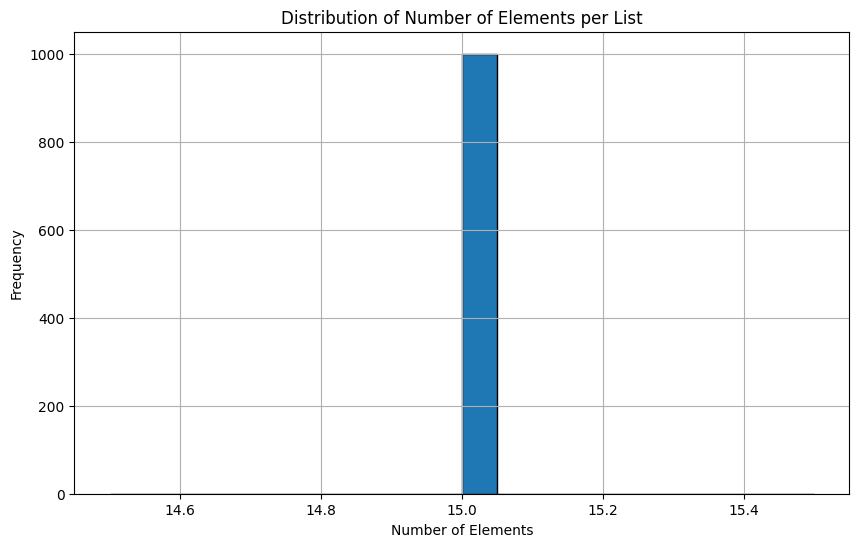

In [30]:
import matplotlib.pyplot as plt

# Get the number of elements per list
num_elements_per_list = [len(hypernyms) if hypernyms else 0 for hypernyms in predictions_list]

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(num_elements_per_list, bins=20, edgecolor='black')
plt.title("Distribution of Number of Elements per List")
plt.xlabel("Number of Elements")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

## Saving the predicitions

In [24]:
def write_hypernyms(hypernyms_to_be_saved, predictions_list):
    print("Within write_hypernyms method")
    with open(hypernyms_to_be_saved, 'w') as f:
        for hyp in predictions_list:
            f.write('\t'.join(hyp[:15]) + '\n')
    print("Hypernyms saved to:", hypernyms_to_be_saved)

In [44]:
# Writing the hypernyms in a text file
write_hypernyms("hypernyms_test_itlalian.txt", predictions_list)

Within write_hypernyms method
Hypernyms saved to: hypernyms_test_itlalian.txt


In [32]:
# Writing the hypernyms in a text file
write_hypernyms("hypernyms_test_spanish.txt", predictions_list)

Within write_hypernyms method
Hypernyms saved to: hypernyms_test_spanish.txt


In [52]:
# Writing the hypernyms in a text file
write_hypernyms("hypernyms_test_mus.txt", predictions_list)

Within write_hypernyms method
Hypernyms saved to: hypernyms_test_mus.txt


In [34]:
# Writing the hypernyms in a text file
write_hypernyms("hypernyms_test_med.txt", predictions_list)

Within write_hypernyms method
Hypernyms saved to: hypernyms_test_med.txt


In [25]:
# Writing the hypernyms in a text file
write_hypernyms("hypernyms_test_english.txt", predictions_list)

Within write_hypernyms method
Hypernyms saved to: hypernyms_test_english.txt
